In [82]:
import pandas as pd

fortune = pd.read_csv('../data/Heart.csv')

X = fortune.iloc[:, :14]
y = fortune.iloc[:, 14:]

X.isnull().sum()
X.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [83]:
print("Before")
print(X.describe())

mean_missing = X.Ca.mean()
X.Ca = X.Ca.fillna(mean_missing)
X.Thal = X.Thal.dropna(axis=0)
# X.isnull().sum()

print("After")
X.describe()

Before
       Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std      0.994971   22.

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [84]:
# X.ChestPain.describe()
X = pd.get_dummies(X, columns=['ChestPain', 'Thal'], prefix=['ChestPain', 'Thal'])
X = X.drop([X.columns[0], 'ChestPain_typical', 'Thal_normal'], axis=1)

X.head(3)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,Thal_fixed,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,1


In [85]:
# y = y.AHD.map({'Yes': 1, 'No': 0})
# y.head(3)

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Model

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [112]:
def run_model(model, model_name, plot_index):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_pred, y_test) * 100
    
    plot_index -=1
    ax = axes[plot_index//3, plot_index%3]
    
    colorcodes = {'Yes': 'red', 'No': 'blue'}
    true_colors = [colorcodes[x] for x in y_test.iloc[:, 0]]
    pred_colors = [colorcodes[x] for x in y_pred]
    
    ax.scatter(X_test["Chol"], X_test['MaxHR'], marker='.', color=true_colors, label='Ground truth')
    ax.scatter(X_test["Chol"], X_test['MaxHR'], marker='o', facecolors='none', color=pred_colors, label='Prediction')
    
    ax.legend(loc='upper right')
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('black')
    leg.legendHandles[1].set_facecolors('none')
    
    ax.set_title('Accuracy = ' + str(round(accuracy,4)) + model_name)
    

C:\Users\Trang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = 

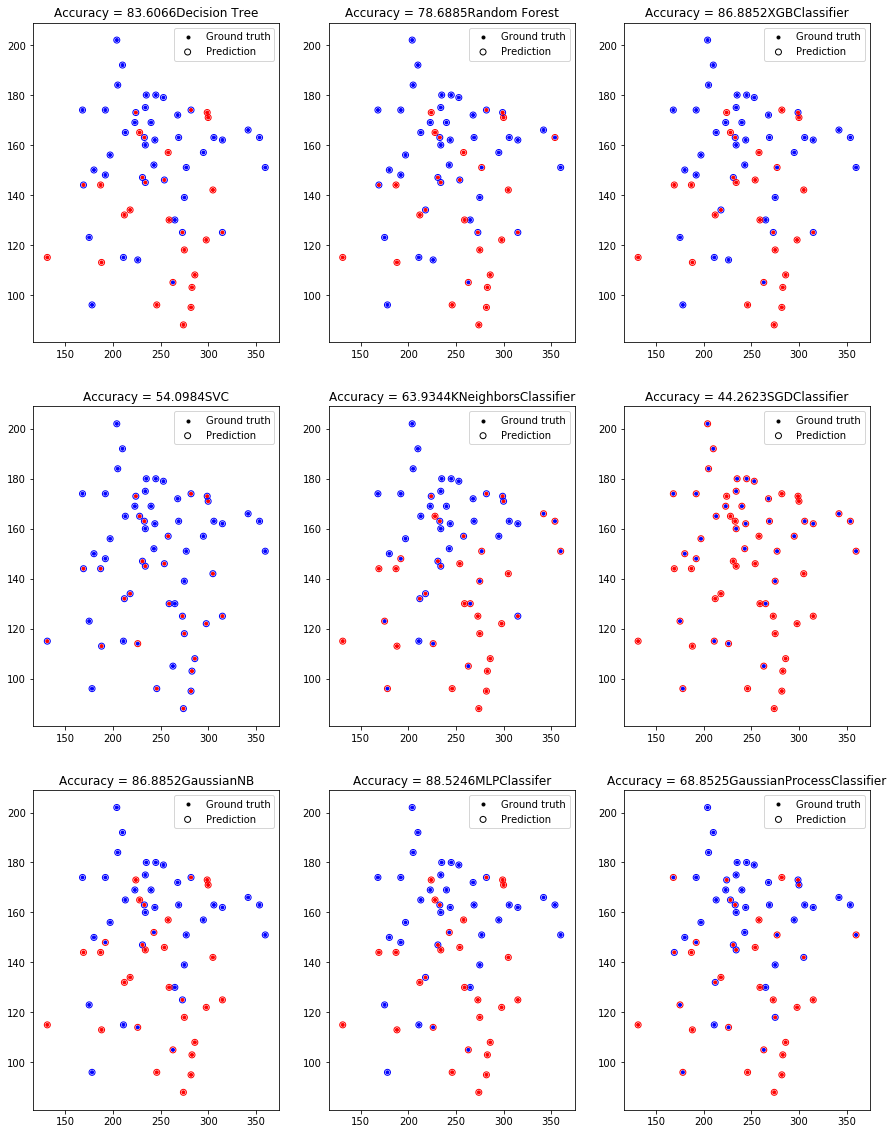

In [113]:
fig = plt.figure(figsize=(15, 20))
axes = fig.subplots(nrows=3, ncols=3)

# Decision tree  
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
run_model(model, "Decision Tree", 1)

# Random forest  
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
run_model(model, "Random Forest", 2)

# XGBoost  
from xgboost import XGBClassifier
model = XGBClassifier()
run_model(model, "XGBClassifier", 3)

# SVM  
from sklearn.svm import SVC
model = SVC()
run_model(model, "SVC", 4)

# KNN  
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
run_model(model, "KNeighborsClassifier", 5)

# SGD  
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
run_model(model, "SGDClassifier", 6)

# Gaussian Naive Bayes  
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
run_model(model, "GaussianNB", 7)

# Neural network  
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
run_model(model, "MLPClassifer", 8)

# Gaussian Process  
from sklearn.gaussian_process import GaussianProcessClassifier
model = GaussianProcessClassifier()
run_model(model, "GaussianProcessClassifier", 9)